In [6]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel

# Example data: Accuracy scores for 4 models across 4 datasets
# Each model's accuracy on each of the 4 datasets
# Model_Accuracies = vector containing accuracy scores over 30 folds
# Load CSV file where data is separated by rows
path = 'Taglish'
method = 'concatenate' # 'concatenate' or 'average'

LR_file = 'statistical_treatment/LOGRES_' + path + '_test_scores.csv'
GLS_file = 'statistical_treatment/GLS_' + path + '_test_scores.csv'
GES_Concate_file = 'statistical_treatment/GES(concatenate)_' + path + '_test_scores.csv'
GES_Average_file = 'statistical_treatment/GES(average)_' + path + '_test_scores.csv'

LR_df = pd.read_csv(LR_file, delimiter=",")  # Adjust delimiter if necessary
GLS_df = pd.read_csv(GLS_file, delimiter=",")  # Adjust delimiter if necessary
GES_Concate_df = pd.read_csv(GES_Concate_file, delimiter=",")  # Adjust delimiter if necessary
GES_Average_df = pd.read_csv(GES_Average_file, delimiter=",")  # Adjust delimiter if necessary

# Transpose the DataFrame to swap rows and columns if needed
LR_df = LR_df.transpose() # dataframe reads CSV by rows, and transposes them into columns instead
GLS_df = GLS_df.transpose()
GES_Concate_df = GES_Concate_df.transpose()
GES_Average_df = GES_Average_df.transpose()

# Convert to numpy array if necessary
LR_array = LR_df.to_numpy().flatten() # convert the dataframe to an array, and flatten it to convert it from an [[array]] to an [array]
GLS_array = GLS_df.to_numpy().flatten() # convert the dataframe to an array, and flatten it to convert it from an [[array]] to an [array]
GES_Concate_array = GES_Concate_df.to_numpy().flatten() # convert the dataframe to an array, and flatten it to convert it from an [[array]] to an [array]
GES_Average_array = GES_Average_df.to_numpy().flatten() # convert the dataframe to an array, and flatten it to convert it from an [[array]] to an [array]
print(LR_array)
print(GLS_array)
print(GES_Concate_array)
print(GES_Average_array)

diff_array = LR_array - GLS_array # create a new array that is made by the difference of the scores of LR to GLS
sample_mean = np.mean(diff_array) # get the mean of the difference array
print("Sample mean:",sample_mean)

# Step for (diff_i - m)^2
squared_differences = (diff_array - sample_mean) ** 2

# Final standard deviation (using N-1 for sample standard deviation)
standard_deviation = np.sqrt(np.sum(squared_differences) / (len(diff_array) - 1))
print("Standard Deviation:", standard_deviation)

# Compute for the t-statistic for the purposes of hypothesis testing
t_statistic = (np.sqrt(len(diff_array)) * sample_mean) / standard_deviation
print("T-statistic:",t_statistic)

[0.76923077 0.88461538 0.92307692 0.53846154 0.80769231 0.76923077
 0.61538462 0.65384615 0.73076923 0.84615385 0.8        0.72
 0.72       0.8        0.84       0.76       0.76       0.8
 0.76       0.76       0.52       0.72       0.8        0.68
 0.84       0.8        0.72       0.68       0.8        0.8       ]
[0.80769231 0.88461538 0.76923077 0.65384615 0.80769231 0.88461538
 0.76923077 0.65384615 0.73076923 0.84615385 0.8        0.72
 0.76       0.84       0.84       0.64       0.84       0.8
 0.72       0.64       0.64       0.8        0.84       0.68
 0.76       0.76       0.72       0.76       0.88       0.76      ]
[0.76923077 0.92307692 0.84615385 0.61538462 0.80769231 0.88461538
 0.61538462 0.73076923 0.65384615 0.84615385 0.84       0.84
 0.72       0.84       0.88       0.68       0.92       0.84
 0.8        0.68       0.72       0.84       0.92       0.64
 0.88       0.84       0.84       0.84       0.88       0.76      ]
[0.76923077 0.92307692 0.84615385 0.61538462 0.6

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel

# Example data: Accuracy scores for 4 models across 4 datasets
# Each model's accuracy on each of the 4 datasets
# Model_Accuracies = [English, Tagalog, Taglish, Mixed]
# Load CSV file where data is separated by rows
path = 'Mixed' # either 'English', 'Tagalog', 'Taglish', or 'Mixed'
# method = 'concatenate' # 'concatenate' or 'average'

LR_file = 'statistical_treatment/LOGRES_' + path + '_test_scores.csv'
GLS_file = 'statistical_treatment/GLS_' + path + '_test_scores.csv'
GES_Concate_file = 'statistical_treatment/GES(concatenate)_' + path + '_test_scores.csv'
GES_Average_file = 'statistical_treatment/GES(average)_' + path + '_test_scores.csv'

LR_df = pd.read_csv(LR_file, delimiter=",")  # Adjust delimiter if necessary
GLS_df = pd.read_csv(GLS_file, delimiter=",")  # Adjust delimiter if necessary
GES_Concate_df = pd.read_csv(GES_Concate_file, delimiter=",")  # Adjust delimiter if necessary
GES_Average_df = pd.read_csv(GES_Average_file, delimiter=",")  # Adjust delimiter if necessary

# Transpose the DataFrame to swap rows and columns if needed
LR_df = LR_df.transpose() # dataframe reads CSV by rows, and transposes them into columns instead
GLS_df = GLS_df.transpose()
GES_Concate_df = GES_Concate_df.transpose()
GES_Average_df = GES_Average_df.transpose()

# Convert to numpy array if necessary
LR_array = LR_df.to_numpy().flatten() # convert the dataframe to an array, and flatten it to convert it from an [[array]] to an [array]
GLS_array = GLS_df.to_numpy().flatten() # convert the dataframe to an array, and flatten it to convert it from an [[array]] to an [array]
GES_Concate_array = GES_Concate_df.to_numpy().flatten() # convert the dataframe to an array, and flatten it to convert it from an [[array]] to an [array]
GES_Average_array = GES_Average_df.to_numpy().flatten() # convert the dataframe to an array, and flatten it to convert it from an [[array]] to an [array]
print(LR_array)
print(GLS_array)
print(GES_Concate_array)
print(GES_Average_array)

# Function to compute paired t-test for Model 1 vs another model
def compare_model_1(model_1, model_2, model_name):
    # Function used for t-test on paired/related values
    # Alternative parameter is "less" for the left-tailed one-tailed paired t-test 
    t_stat, p_value = ttest_rel(model_1, model_2, alternative='greater')
    print(f"Comparing Regressor and {model_name}:")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"Reject the null hypothesis: {model_name} has significantly better accuracy than GloVe-Linear Regression for the {path} dataset.\n")
    else:
        print(f"Fail to reject the null hypothesis: No significant improvement in accuracy by {model_name} over GloVe-Linear Regression for the {path} dataset.\n")

# Perform paired t-tests comparing GloVe-Logistic Regression with GloVe-LSA-SVM, GloVe-ELMo-SVM (concatenated), and GloVe-ELMo-SVM (averaged)
# compare_model_1(LR_array, GLS_array, "GloVe-LSA-SVM")
# compare_model_1(LR_array, GES_Concate_array, "GloVe-ELMo-SVM (concatenated)")
# compare_model_1(LR_array, GES_Average_array, "GloVe-ELMo-SVM (averaged)")
compare_model_1(GLS_array, LR_array, "GloVe-LSA-SVM")
compare_model_1(GES_Concate_array, LR_array, "GloVe-ELMo-SVM (concatenated)")
compare_model_1(GES_Average_array, LR_array, "GloVe-ELMo-SVM (averaged)")

[0.84883721 0.84883721 0.80813953 0.81976744 0.79069767 0.86046512
 0.80232558 0.84302326 0.77906977 0.80813953 0.8372093  0.8255814
 0.81976744 0.87790698 0.86046512 0.76744186 0.80813953 0.86627907
 0.79069767 0.81976744 0.85465116 0.81395349 0.8255814  0.84302326
 0.80813953 0.84883721 0.77906977 0.84302326 0.84883721 0.84883721]
[0.81976744 0.8255814  0.74418605 0.74418605 0.74418605 0.81395349
 0.77906977 0.79651163 0.78488372 0.76744186 0.80813953 0.79651163
 0.79651163 0.78488372 0.80232558 0.76162791 0.76162791 0.80232558
 0.79069767 0.77906977 0.81976744 0.77906977 0.79069767 0.85465116
 0.81395349 0.80232558 0.74418605 0.79651163 0.77906977 0.81395349]
[0.86627907 0.9127907  0.84302326 0.8255814  0.8255814  0.86046512
 0.87209302 0.90697674 0.84883721 0.86627907 0.86627907 0.87790698
 0.88953488 0.9127907  0.89534884 0.85465116 0.84302326 0.89534884
 0.84302326 0.89534884 0.87209302 0.86046512 0.84883721 0.9127907
 0.86627907 0.84883721 0.83139535 0.87790698 0.88953488 0.8779

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_rel

# Example data: Accuracy scores for 4 models across 4 datasets
# Each model's accuracy on each of the 4 datasets
# Model_Accuracies = [English, Tagalog, Taglish, Mixed]
# Load CSV file where data is separated by rows
# path = 'Taglish' # either 'English', 'Tagalog', 'Taglish', or 'Mixed'
# method = 'concatenate' # 'concatenate' or 'average'

# file names
LR_eng_file = 'statistical_treatment/LOGRES_English_test_scores.csv'
LR_tl_file = 'statistical_treatment/LOGRES_Tagalog_test_scores.csv'
LR_tag_file = 'statistical_treatment/LOGRES_Taglish_test_scores.csv'
LR_mix_file = 'statistical_treatment/LOGRES_Mixed_test_scores.csv'

GLS_eng_file = 'statistical_treatment/GLS_English_test_scores.csv'
GLS_tl_file = 'statistical_treatment/GLS_Tagalog_test_scores.csv'
GLS_tag_file = 'statistical_treatment/GLS_Taglish_test_scores.csv'
GLS_mix_file = 'statistical_treatment/GLS_Mixed_test_scores.csv'

GES_Concate_eng_file = 'statistical_treatment/GES(concatenate)_English_test_scores.csv'
GES_Concate_tl_file = 'statistical_treatment/GES(concatenate)_Tagalog_test_scores.csv'
GES_Concate_tag_file = 'statistical_treatment/GES(concatenate)_Taglish_test_scores.csv'
GES_Concate_mix_file = 'statistical_treatment/GES(concatenate)_Mixed_test_scores.csv'

GES_Average_eng_file = 'statistical_treatment/GES(average)_English_test_scores.csv'
GES_Average_tl_file = 'statistical_treatment/GES(average)_Tagalog_test_scores.csv'
GES_Average_tag_file = 'statistical_treatment/GES(average)_Taglish_test_scores.csv'
GES_Average_mix_file = 'statistical_treatment/GES(average)_Mixed_test_scores.csv'

# create pandas dataframes by reading csv's retrieved from the file names
LR_english_df = pd.read_csv(LR_eng_file, delimiter=",")  # Adjust delimiter if necessary
LR_tagalog_df = pd.read_csv(LR_tl_file, delimiter=",")
LR_taglish_df = pd.read_csv(LR_tag_file, delimiter=",")
LR_mixed_df = pd.read_csv(LR_mix_file, delimiter=",")

GLS_english_df = pd.read_csv(GLS_eng_file, delimiter=",")
GLS_tagalog_df = pd.read_csv(GLS_tl_file, delimiter=",")
GLS_taglish_df = pd.read_csv(GLS_tag_file, delimiter=",")
GLS_mixed_df = pd.read_csv(GLS_mix_file, delimiter=",")

GES_Concate_english_df = pd.read_csv(GES_Concate_eng_file, delimiter=",")
GES_Concate_tagalog_df = pd.read_csv(GES_Concate_tl_file, delimiter=",")
GES_Concate_taglish_df = pd.read_csv(GES_Concate_tag_file, delimiter=",")
GES_Concate_mixed_df = pd.read_csv(GES_Concate_mix_file, delimiter=",")

GES_Average_english_df = pd.read_csv(GES_Average_eng_file, delimiter=",")
GES_Average_tagalog_df = pd.read_csv(GES_Average_tl_file, delimiter=",")
GES_Average_taglish_df = pd.read_csv(GES_Average_tag_file, delimiter=",")
GES_Average_mixed_df = pd.read_csv(GES_Average_mix_file, delimiter=",")

# Transpose the DataFrame to swap rows and columns if needed
LR_english_df = LR_english_df.transpose() # dataframe reads CSV by rows, and transposes them into columns instead
LR_tagalog_df = LR_tagalog_df.transpose()
LR_taglish_df = LR_taglish_df.transpose()
LR_mixed_df = LR_mixed_df.transpose()

GLS_english_df = GLS_english_df.transpose()
GLS_tagalog_df = GLS_tagalog_df.transpose()
GLS_taglish_df = GLS_taglish_df.transpose()
GLS_mixed_df = GLS_mixed_df.transpose()

GES_Concate_english_df = GES_Concate_english_df.transpose()
GES_Concate_tagalog_df = GES_Concate_tagalog_df.transpose()
GES_Concate_taglish_df = GES_Concate_taglish_df.transpose()
GES_Concate_mixed_df = GES_Concate_mixed_df.transpose()

GES_Average_english_df = GES_Average_english_df.transpose()
GES_Average_tagalog_df = GES_Average_tagalog_df.transpose()
GES_Average_taglish_df = GES_Average_taglish_df.transpose()
GES_Average_mixed_df = GES_Average_mixed_df.transpose()

# Convert to numpy array if necessary
LR_english_array = LR_english_df.to_numpy().flatten() # convert the dataframe to an array, and flatten it to convert it from an [[array]] to an [array]
LR_tagalog_array = LR_tagalog_df.to_numpy().flatten() 
LR_taglish_array = LR_taglish_df.to_numpy().flatten() 
LR_mixed_array = LR_mixed_df.to_numpy().flatten()

GLS_english_array = GLS_english_df.to_numpy().flatten()
GLS_tagalog_array = GLS_tagalog_df.to_numpy().flatten()
GLS_taglish_array = GLS_taglish_df.to_numpy().flatten()
GLS_mixed_array = GLS_mixed_df.to_numpy().flatten()

GES_Concate_english_array = GES_Concate_english_df.to_numpy().flatten()
GES_Concate_tagalog_array = GES_Concate_tagalog_df.to_numpy().flatten()
GES_Concate_taglish_array = GES_Concate_taglish_df.to_numpy().flatten()
GES_Concate_mixed_array = GES_Concate_mixed_df.to_numpy().flatten()

GES_Average_english_array = GES_Average_english_df.to_numpy().flatten()
GES_Average_tagalog_array = GES_Average_tagalog_df.to_numpy().flatten()
GES_Average_taglish_array = GES_Average_taglish_df.to_numpy().flatten()
GES_Average_mixed_array = GES_Average_mixed_df.to_numpy().flatten()

# Combine all model accuracies into one array and flatten them into a single array
LR_array = np.array([LR_english_array, LR_tagalog_array, LR_taglish_array, LR_mixed_array]).flatten()
GLS_array = np.array([GLS_english_array, GLS_tagalog_array, GLS_taglish_array, GLS_mixed_array]).flatten()
GES_Concate_array = np.array([GES_Concate_english_array, GES_Concate_tagalog_array, GES_Concate_taglish_array, GES_Concate_mixed_array]).flatten()
GES_Average_array = np.array([GES_Average_english_array, GES_Average_tagalog_array, GES_Average_taglish_array, GES_Average_mixed_array]).flatten()

print(LR_array)
# print(len(LR_array))
print(GLS_array)
print(GES_Concate_array)
print(GES_Average_array)

# Function to compute paired t-test for Model 1 vs another model
def compare_model_1(model_1, model_2, model_name):
    # Function used for t-test on paired/related values
    # Alternative parameter is "less" for the left-tailed one-tailed paired t-test 
    t_stat, p_value = ttest_rel(model_1, model_2, alternative='greater')
    print(f"Comparing Regressor and {model_name}:")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"Reject the null hypothesis: {model_name} has significantly better accuracy than GloVe-Linear Regression overall.\n")
    else:
        print(f"Fail to reject the null hypothesis: No significant improvement in accuracy by {model_name} over GloVe-Linear Regression overall.\n")

# Perform paired t-tests comparing GloVe-Logistic Regression with GloVe-LSA-SVM, GloVe-ELMo-SVM (concatenated), and GloVe-ELMo-SVM (averaged)
# compare_model_1(LR_array, GLS_array, "GloVe-LSA-SVM")
# compare_model_1(LR_array, GES_Concate_array, "GloVe-ELMo-SVM (concatenated)")
# compare_model_1(LR_array, GES_Average_array, "GloVe-ELMo-SVM (averaged)")
compare_model_1(GLS_array, LR_array, "GloVe-LSA-SVM")
compare_model_1(GES_Concate_array, LR_array, "GloVe-ELMo-SVM (concatenated)")
compare_model_1(GES_Average_array, LR_array, "GloVe-ELMo-SVM (averaged)")

[0.86363636 0.86363636 0.86363636 0.875      0.81818182 0.85227273
 0.86363636 0.875      0.875      0.73863636 0.84090909 0.84090909
 0.81818182 0.875      0.82954545 0.86363636 0.88505747 0.88505747
 0.81609195 0.91954023 0.87356322 0.88505747 0.87356322 0.83908046
 0.88505747 0.85057471 0.93103448 0.87356322 0.85057471 0.83908046
 0.875      0.92857143 0.89285714 0.85714286 0.875      0.91071429
 0.89285714 0.875      0.875      0.85714286 0.92857143 0.875
 0.91071429 0.875      0.875      0.83928571 0.92857143 0.82142857
 0.91071429 0.83928571 0.89285714 0.94642857 0.92857143 0.85714286
 0.91071429 0.875      0.83928571 0.83928571 0.91071429 0.85714286
 0.76923077 0.88461538 0.92307692 0.53846154 0.80769231 0.76923077
 0.61538462 0.65384615 0.73076923 0.84615385 0.8        0.72
 0.72       0.8        0.84       0.76       0.76       0.8
 0.76       0.76       0.52       0.72       0.8        0.68
 0.84       0.8        0.72       0.68       0.8        0.8
 0.84883721 0.84883721 0.8

In [10]:
import numpy as np
from scipy.stats import ttest_rel

# Example data: Accuracy scores for 4 models across 4 datasets
# Each model's accuracy on each of the 4 datasets
# Model_Accuracies = [English, Tagalog, Taglish, Mixed]
Regressor_accuracies   = [0.79, 0.76, 0.71, 0.74]
GLS_accuracies         = [0.77, 0.73, 0.73, 0.72]
GES_Concate_accuracies = [0.81, 0.75, 0.75, 0.76]
GES_Average_accuracies = [0.81, 0.78, 0.77, 0.80]

# Function to compute paired t-test for Model 1 vs another model
def compare_model_1(model_1, model_2, model_name_2):
    t_stat, p_value = ttest_rel(model_1, model_2)
    print(f"Comparing Regressor and {model_name_2}:")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"Reject the null hypothesis: Model 1 and {model_name_2} have significantly different accuracies.\n")
    else:
        print(f"Fail to reject the null hypothesis: No significant difference in accuracy between Model 1 and {model_name_2}.\n")

# Perform paired t-tests comparing Model 1 with Model 2, Model 3, and Model 4
compare_model_1(Regressor_accuracies, GLS_accuracies, "GLS")
compare_model_1(Regressor_accuracies, GES_Concate_accuracies, "GES_Concate")
compare_model_1(Regressor_accuracies, GES_Average_accuracies, "GES_Average")


Comparing Regressor and GLS:
T-statistic: 1.1275, P-value: 0.3416
Fail to reject the null hypothesis: No significant difference in accuracy between Model 1 and GLS.

Comparing Regressor and GES_Concate:
T-statistic: -1.6977, P-value: 0.1881
Fail to reject the null hypothesis: No significant difference in accuracy between Model 1 and GES_Concate.

Comparing Regressor and GES_Average:
T-statistic: -3.4641, P-value: 0.0405
Reject the null hypothesis: Model 1 and GES_Average have significantly different accuracies.



In [2]:
import numpy as np
from scipy.stats import ttest_rel

# Example data: Accuracy scores for 4 models across 4 datasets
# Each model's accuracy on each of the 4 datasets
# Model_Accuracies = [English, Tagalog, Taglish, Mixed]
Regressor_accuracies   = [0.79, 0.76, 0.71, 0.74]
GLS_accuracies         = [0.77, 0.73, 0.73, 0.72]
GES_Average_accuracies = [0.81, 0.75, 0.75, 0.76]
GES_Concate_accuracies = [0.81, 0.78, 0.77, 0.80]

# Function to compute paired t-test for Model 1 vs another model
def compare_model_1(model_1, model_2, model_name_2):
    t_stat, p_value = ttest_rel(model_1, model_2)
    
    # Check if t-statistic is positive (model_2 is better) or negative (model_2 is worse)
    if t_stat > 0:
        p_value /= 2  # One-tailed, divide p-value by 2
    
    print(f"Comparing Regressor and {model_name_2}:")
    print(f"T-statistic: {t_stat:.4f}, One-tailed P-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print(f"Reject the null hypothesis: {model_name_2} has significantly better accuracy than Regressor.\n")
    else:
        print(f"Fail to reject the null hypothesis: No significant improvement in accuracy by {model_name_2} over Regressor.\n")

# Perform one-tailed t-tests comparing Regressor to each other model
compare_model_1(Regressor_accuracies, GLS_accuracies, "GLS")
compare_model_1(Regressor_accuracies, GES_Concate_accuracies, "GES_Concat")
compare_model_1(Regressor_accuracies, GES_Average_accuracies, "GES_Average")


Comparing Regressor and GLS:
T-statistic: 1.1275, One-tailed P-value: 0.1708
Fail to reject the null hypothesis: No significant improvement in accuracy by GLS over Regressor.

Comparing Regressor and GES_Concat:
T-statistic: -3.4641, One-tailed P-value: 0.0405
Reject the null hypothesis: GES_Concat has significantly better accuracy than Regressor.

Comparing Regressor and GES_Average:
T-statistic: -1.6977, One-tailed P-value: 0.1881
Fail to reject the null hypothesis: No significant improvement in accuracy by GES_Average over Regressor.



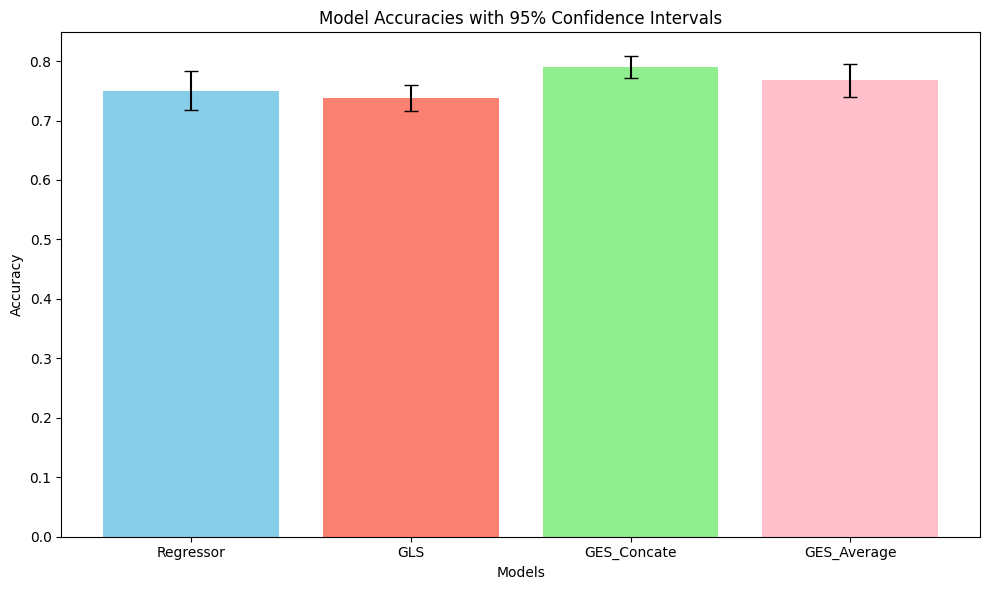

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, t

# Define the accuracies for the models
Regressor_accuracies   = [0.79, 0.76, 0.71, 0.74]
GLS_accuracies         = [0.77, 0.73, 0.73, 0.72]
GES_Average_accuracies = [0.81, 0.75, 0.75, 0.76]
GES_Concate_accuracies = [0.81, 0.78, 0.77, 0.80]

# Function to compute confidence intervals (95% CI)
def compute_ci(data):
    mean = np.mean(data)
    ci = 1.96 * sem(data)  # 1.96 for 95% CI assuming normal distribution
    return mean, ci

# Compute means and confidence intervals for each model
models = {
    "Regressor": Regressor_accuracies,
    "GLS": GLS_accuracies,
    "GES_Concate": GES_Concate_accuracies,
    "GES_Average": GES_Average_accuracies
}

means = []
cis = []

for model_name, accuracies in models.items():
    mean, ci = compute_ci(accuracies)
    means.append(mean)
    cis.append(ci)

# Create bar plot with error bars (confidence intervals)
plt.figure(figsize=(10, 6))
plt.bar(models.keys(), means, yerr=cis, capsize=5, color=['skyblue', 'salmon', 'lightgreen', 'pink'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies with 95% Confidence Intervals')
plt.tight_layout()

# Display the plot
plt.show()


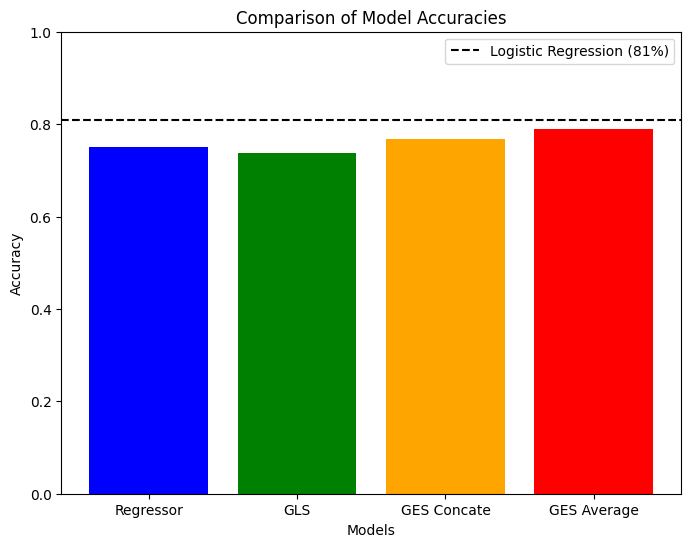

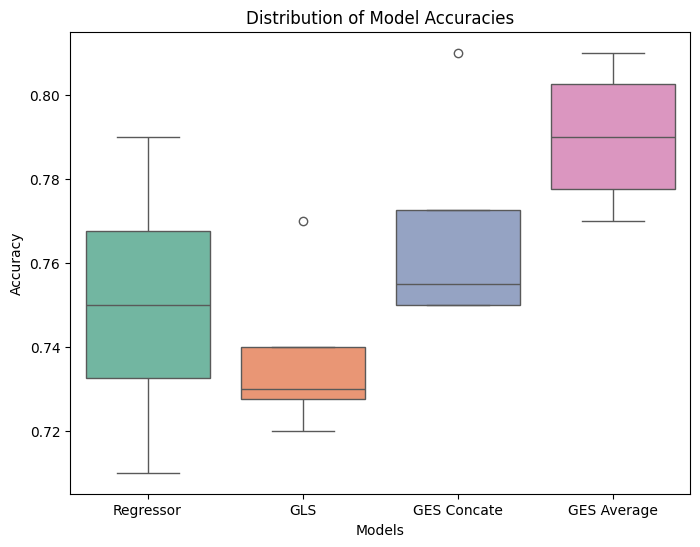

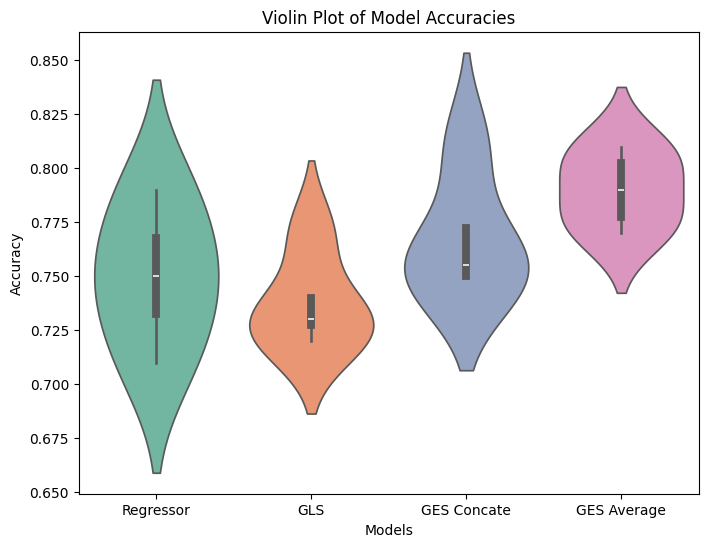

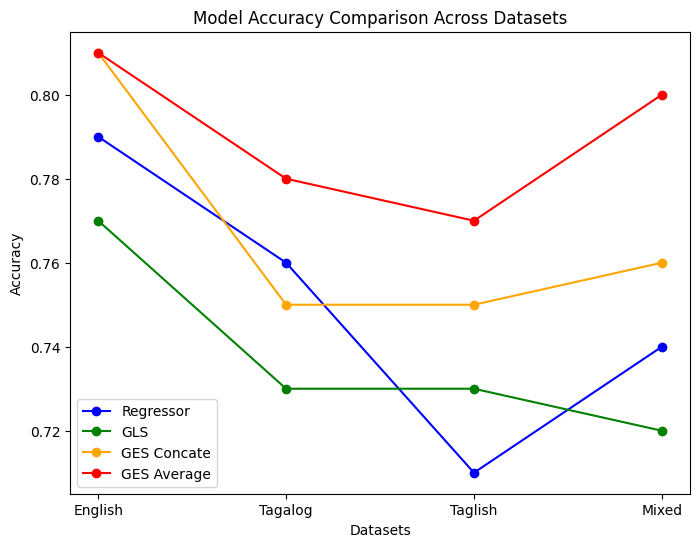

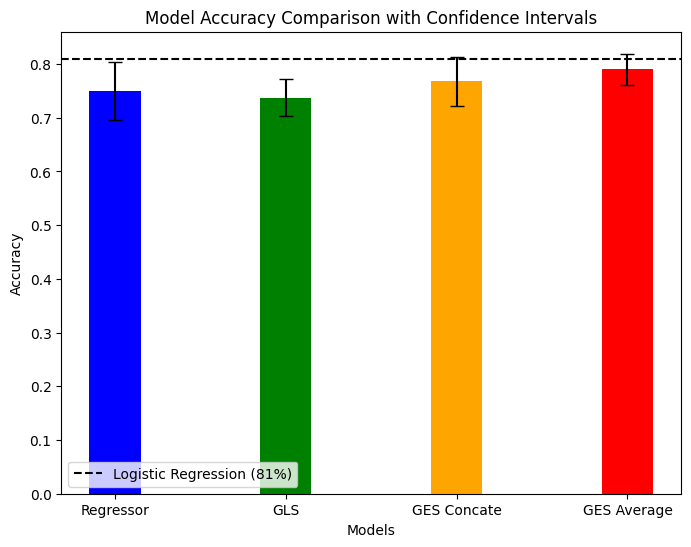

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
import scipy.stats as stats

# Example accuracy data for 4 models across 4 datasets
Regressor_accuracies   = [0.79, 0.76, 0.71, 0.74]
GLS_accuracies         = [0.77, 0.73, 0.73, 0.72]
GES_Concate_accuracies = [0.81, 0.75, 0.75, 0.76]
GES_Average_accuracies = [0.81, 0.78, 0.77, 0.80]

# Dataset names
dataset_names = ['English', 'Tagalog', 'Taglish', 'Mixed']
models = ['Regressor', 'GLS', 'GES Concate', 'GES Average']

# Combined accuracies for box plot and violin plot
all_accuracies = [Regressor_accuracies, GLS_accuracies, GES_Concate_accuracies, GES_Average_accuracies]

# 1. **Bar Plot: Average Accuracy Comparison**
accuracies = [np.mean(Regressor_accuracies), np.mean(GLS_accuracies), 
              np.mean(GES_Concate_accuracies), np.mean(GES_Average_accuracies)]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title("Comparison of Model Accuracies")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0, 1)
plt.axhline(y=0.81, color='black', linestyle='--', label="Logistic Regression (81%)")  # Baseline line
plt.legend()
plt.show()

# 2. **Box Plot: Distribution of Accuracies**
plt.figure(figsize=(8, 6))
sns.boxplot(data=all_accuracies, palette="Set2")
plt.xticks([0, 1, 2, 3], models)
plt.title("Distribution of Model Accuracies")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.show()

# 3. **Violin Plot: Distribution of Accuracies with Density**
plt.figure(figsize=(8, 6))
sns.violinplot(data=all_accuracies, palette="Set2")
plt.xticks([0, 1, 2, 3], models)
plt.title("Violin Plot of Model Accuracies")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.show()

# 4. **Paired Line Plot: Accuracy Comparison Across Datasets**
plt.figure(figsize=(8, 6))
plt.plot(dataset_names, Regressor_accuracies, label="Regressor", marker='o', color='blue')
plt.plot(dataset_names, GLS_accuracies, label="GLS", marker='o', color='green')
plt.plot(dataset_names, GES_Concate_accuracies, label="GES Concate", marker='o', color='orange')
plt.plot(dataset_names, GES_Average_accuracies, label="GES Average", marker='o', color='red')

plt.title("Model Accuracy Comparison Across Datasets")
plt.xlabel("Datasets")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 5. **Bar Plot with Confidence Intervals**
conf_interval_regressor = stats.t.interval(0.95, len(Regressor_accuracies)-1, loc=np.mean(Regressor_accuracies), scale=stats.sem(Regressor_accuracies))
conf_interval_gls = stats.t.interval(0.95, len(GLS_accuracies)-1, loc=np.mean(GLS_accuracies), scale=stats.sem(GLS_accuracies))
conf_interval_ges_concate = stats.t.interval(0.95, len(GES_Concate_accuracies)-1, loc=np.mean(GES_Concate_accuracies), scale=stats.sem(GES_Concate_accuracies))
conf_interval_ges_average = stats.t.interval(0.95, len(GES_Average_accuracies)-1, loc=np.mean(GES_Average_accuracies), scale=stats.sem(GES_Average_accuracies))

# Confidence intervals
conf_intervals = [
    (conf_interval_regressor[1] - np.mean(Regressor_accuracies), np.mean(Regressor_accuracies)),
    (conf_interval_gls[1] - np.mean(GLS_accuracies), np.mean(GLS_accuracies)),
    (conf_interval_ges_concate[1] - np.mean(GES_Concate_accuracies), np.mean(GES_Concate_accuracies)),
    (conf_interval_ges_average[1] - np.mean(GES_Average_accuracies), np.mean(GES_Average_accuracies))
]

# Create a bar plot with confidence intervals
plt.figure(figsize=(8, 6))
bar_width = 0.3
x = np.arange(len(models))

# Create a bar plot with error bars
plt.bar(x, accuracies, bar_width, color=['blue', 'green', 'orange', 'red'], 
        yerr=[conf_intervals[0][0], conf_intervals[1][0], conf_intervals[2][0], conf_intervals[3][0]],
        capsize=5)

plt.axhline(y=0.81, color='black', linestyle='--', label="Logistic Regression (81%)")  # Baseline line
plt.xticks(x, models)
plt.title("Model Accuracy Comparison with Confidence Intervals")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.legend()
plt.show()


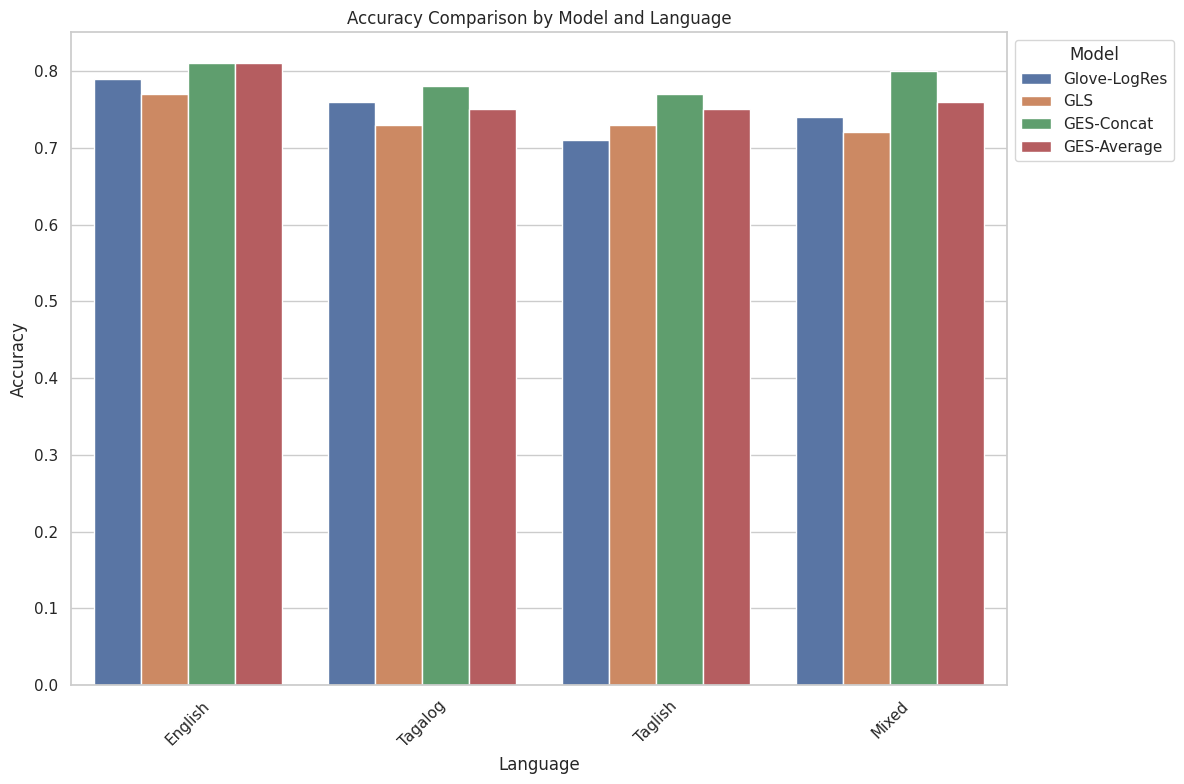

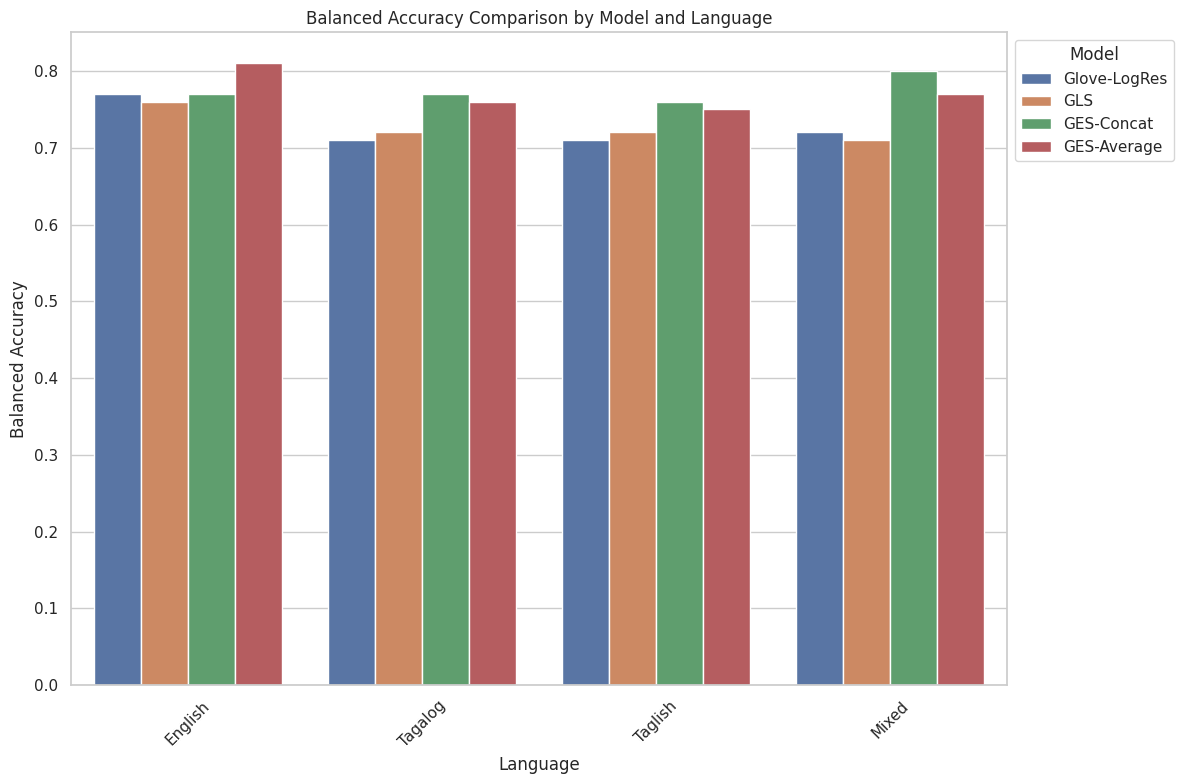

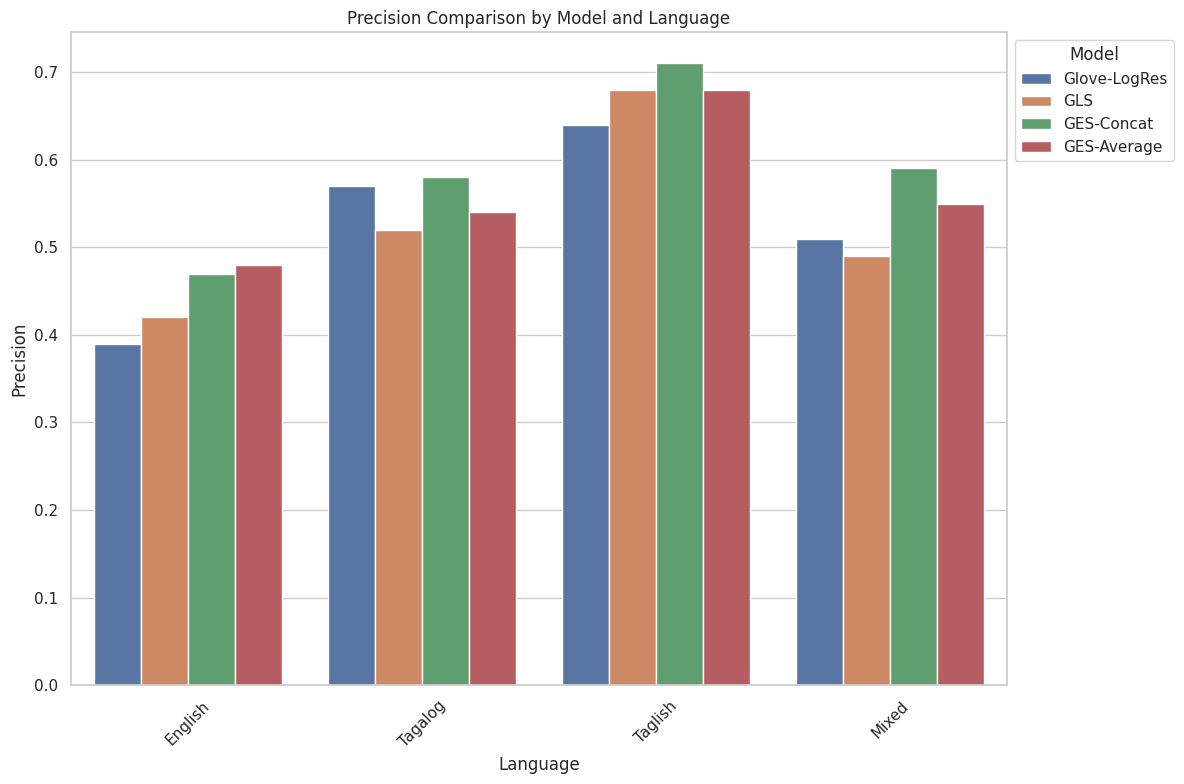

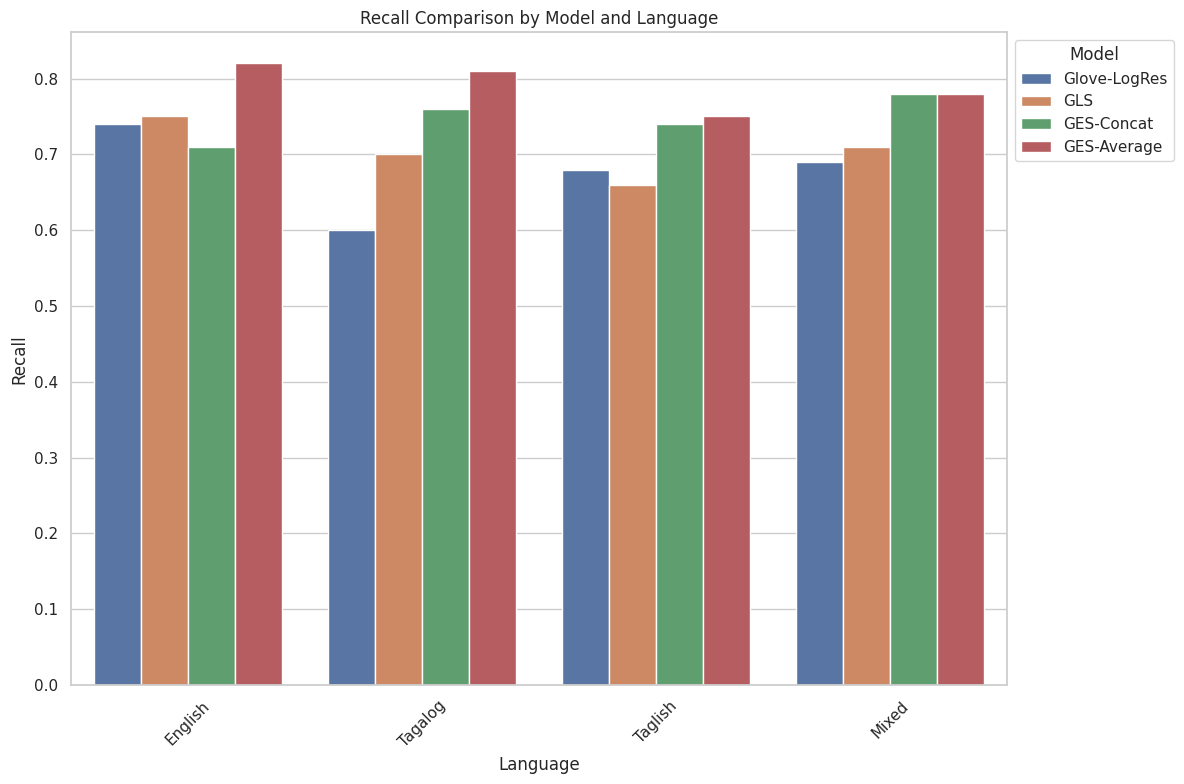

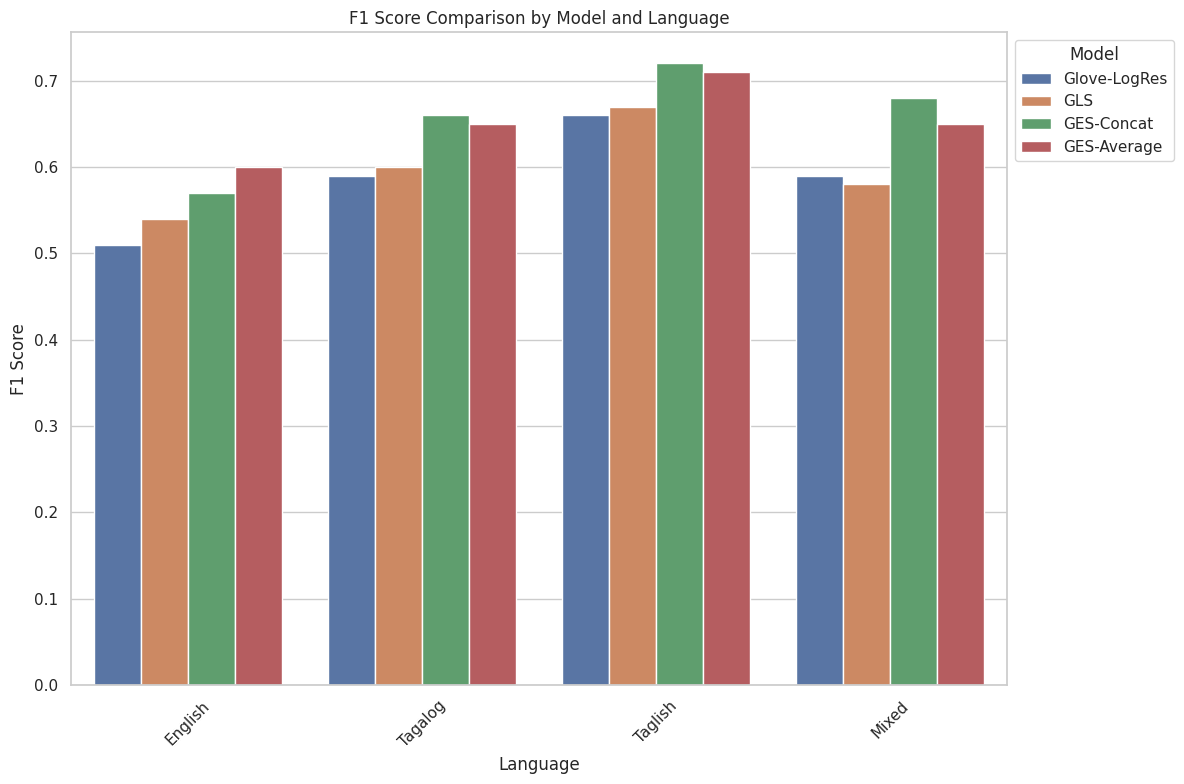

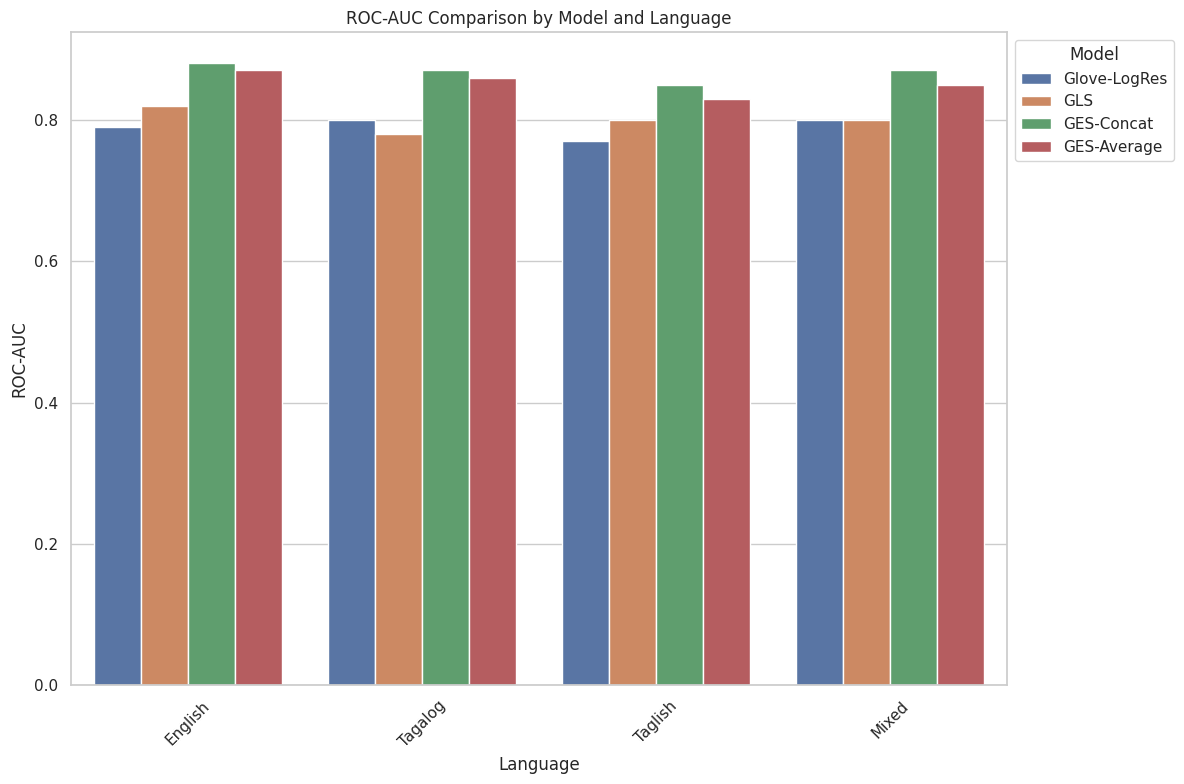

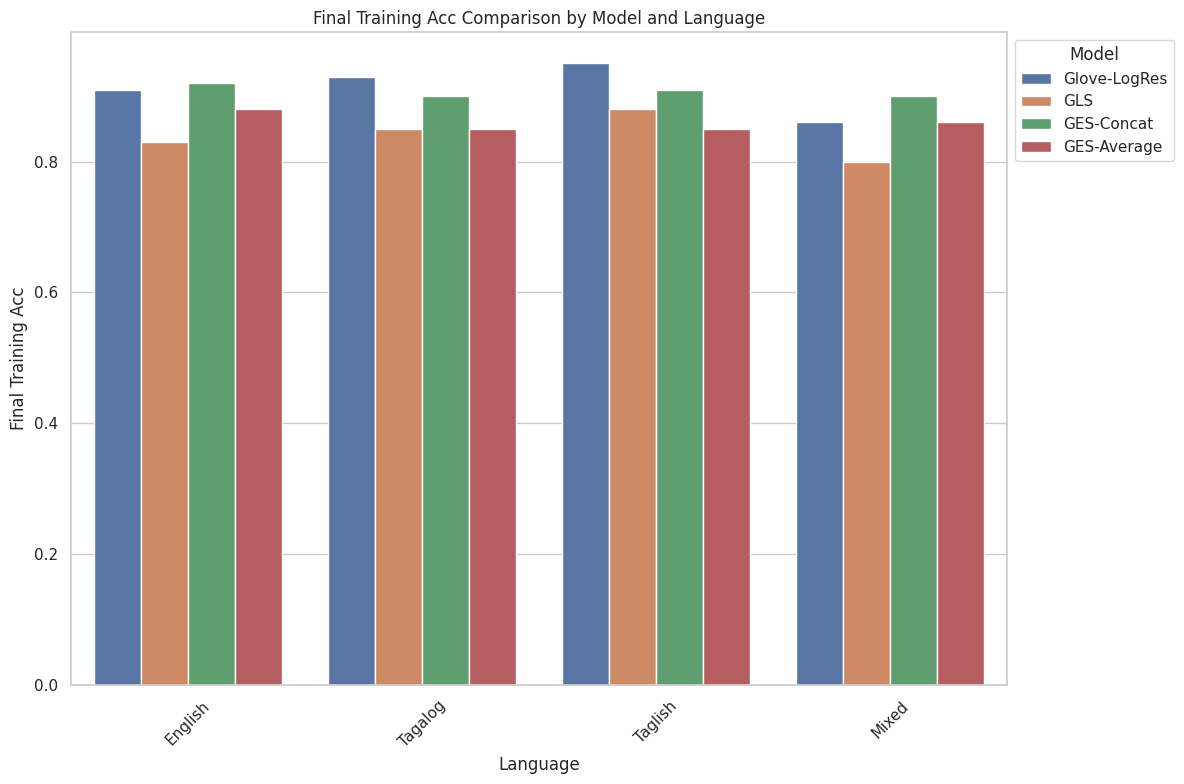

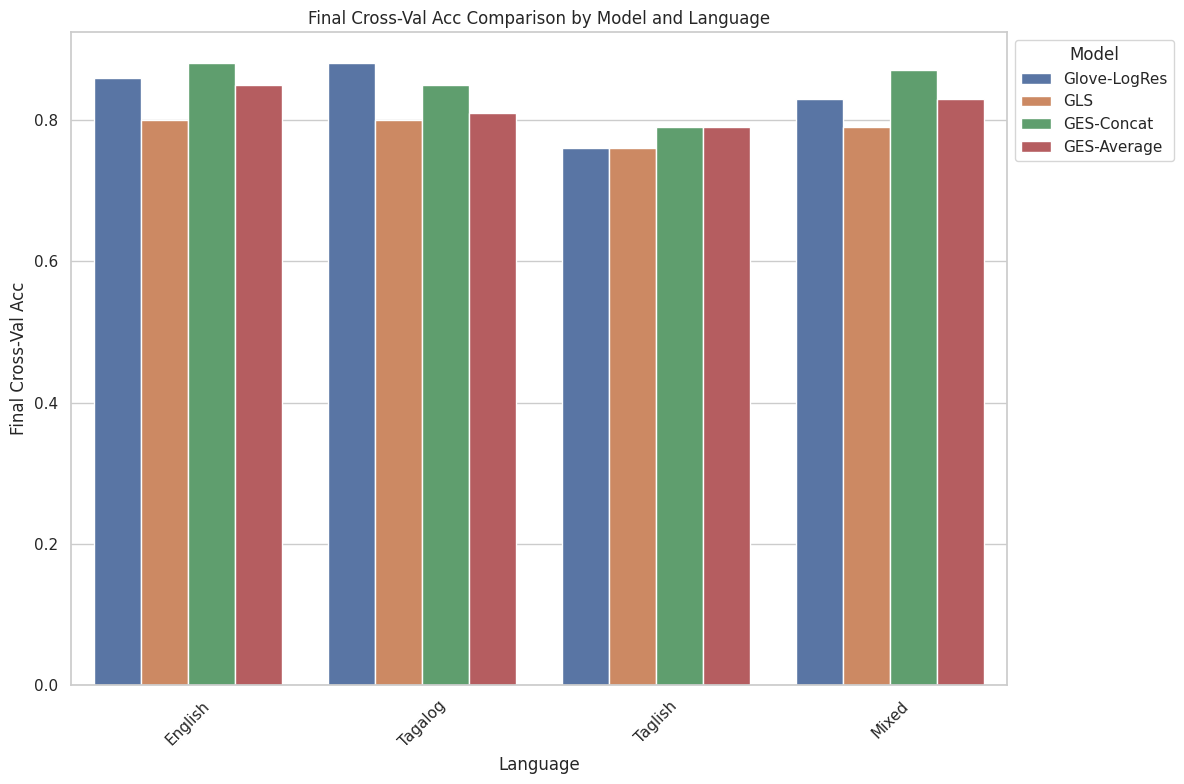

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the dataset as a dictionary
data = {
    'Model': ['Glove-LogRes', 'GLS', 'GES-Concat', 'GES-Average'] * 4,
    'Language': ['English', 'English', 'English', 'English', 
                 'Tagalog', 'Tagalog', 'Tagalog', 'Tagalog', 
                 'Taglish', 'Taglish', 'Taglish', 'Taglish', 
                 'Mixed', 'Mixed', 'Mixed', 'Mixed'],
    'Accuracy': [0.79, 0.77, 0.81, 0.81, 0.76, 0.73, 0.78, 0.75, 
                 0.71, 0.73, 0.77, 0.75, 0.74, 0.72, 0.8, 0.76],
    'Balanced Accuracy': [0.77, 0.76, 0.77, 0.81, 0.71, 0.72, 0.77, 0.76, 
                          0.71, 0.72, 0.76, 0.75, 0.72, 0.71, 0.8, 0.77],
    'Precision': [0.39, 0.42, 0.47, 0.48, 0.57, 0.52, 0.58, 0.54, 
                  0.64, 0.68, 0.71, 0.68, 0.51, 0.49, 0.59, 0.55],
    'Recall': [0.74, 0.75, 0.71, 0.82, 0.6, 0.7, 0.76, 0.81, 
               0.68, 0.66, 0.74, 0.75, 0.69, 0.71, 0.78, 0.78],
    'F1 Score': [0.51, 0.54, 0.57, 0.6, 0.59, 0.6, 0.66, 0.65, 
                 0.66, 0.67, 0.72, 0.71, 0.59, 0.58, 0.68, 0.65],
    'ROC-AUC': [0.79, 0.82, 0.88, 0.87, 0.8, 0.78, 0.87, 0.86, 
                0.77, 0.8, 0.85, 0.83, 0.8, 0.8, 0.87, 0.85],
    'Final Training Acc': [0.91, 0.83, 0.92, 0.88, 0.93, 0.85, 0.9, 0.85, 
                           0.95, 0.88, 0.91, 0.85, 0.86, 0.8, 0.9, 0.86],
    'Final Cross-Val Acc': [0.86, 0.8, 0.88, 0.85, 0.88, 0.8, 0.85, 0.81, 
                            0.76, 0.76, 0.79, 0.79, 0.83, 0.79, 0.87, 0.83]
}

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

# Reshape the DataFrame to a long format for easy plotting
df_long = pd.melt(df, id_vars=['Model', 'Language'], var_name='Metric', value_name='Value')

# Set the style for the plots
sns.set(style="whitegrid")

# Create a function to plot the metrics for each language
def plot_metrics(metric_name):
    plt.figure(figsize=(12, 8))  # Increase figure height to accommodate legend
    sns.barplot(data=df_long[df_long['Metric'] == metric_name], 
                x='Language', y='Value', hue='Model')
    plt.title(f'{metric_name} Comparison by Model and Language')
    plt.ylabel(metric_name)
    plt.xlabel('Language')
    plt.xticks(rotation=45)
    plt.legend(title='Model', loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside
    plt.tight_layout()  # Automatically adjust layout
    plt.show()

# Plot the Accuracy comparison
plot_metrics('Accuracy')

# Plot the Balanced Accuracy comparison
plot_metrics('Balanced Accuracy')

# Plot the Precision comparison
plot_metrics('Precision')

# Plot the Recall comparison
plot_metrics('Recall')

# Plot the F1 Score comparison
plot_metrics('F1 Score')

# Plot the ROC-AUC comparison
plot_metrics('ROC-AUC')

# Plot the Final Training Accuracy comparison
plot_metrics('Final Training Acc')

# Plot the Final Cross-Val Accuracy comparison
plot_metrics('Final Cross-Val Acc')
